<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
with open('sat_scores.csv', 'rb') as csvfile:
    sat_data = csv.reader(csvfile)
    sat_list = list(sat_data)
    
    dict_keys = sat_list[0]
    sat_list_values = sat_list[1:]
    
    sat = {value:[row[index] for row in sat_list_values] for index, value in enumerate(dict_keys)}
    
# csvfile.seek(0) will return to start of file

print (sat)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_df = pd.read_csv('sat_scores.csv', encoding='utf-8')
print sat_df.dtypes
sat_df.head(3)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515


In [5]:
sat_df1 = pd.DataFrame(sat)
print sat_df.dtypes
sat_df1.head(3)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
print sat_df[sat_df.State == 'All']
print len(sat_df.State.unique())
sat_df.describe()

   State  Rate  Verbal  Math
51   All    45     506   514
52


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [7]:
# Remove row where State = All
sat_df = sat_df[sat_df.State != 'All']

assert ('All' not in sat_df.State)

In [8]:
sat_df['Total'] = sat_df['Verbal'] + sat_df['Math']
sat_df.sort_values(['Rate', 'Total']).head(15)

,State,Rate,Verbal,Math,Total
50,MS,4,566,551,1117
48,SD,4,577,582,1159
49,ND,4,592,599,1191
46,UT,5,575,570,1145
47,IA,5,593,603,1196
45,AR,6,562,550,1112
44,WI,6,584,596,1180
43,LA,7,564,562,1126
41,OK,8,567,561,1128
40,NE,8,562,568,1130


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: blue; font-size: 15px">
a. Writing Score missing <br>
b. Participation rate seems to have inverse relationship with Total score <br>
c. Those below 10% rate have scores that are higher than respective mean <br>
d. ACT (American College Test) mandatory in some states, so only the brightest will also take SAT <br>
e. ACT Mandatory - Alabama,Hawaii,Minnesota,Missouri,Montana,Nevada,North Carolina,South Carolina,Wisconsin,Wyoming
</p>
</div>

In [9]:
sat_df.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
Total     0
dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dict = {'State' : {'Type' : 'Str', 'Description' : 'US state'},
             'Rate' : {'Type' : 'Int', 'Description' : 'Participation rate in %'},
             'Verbal' : {'Type' : 'Int', 'Description' : 'Verbal test score'},
             'Math' : {'Type' : 'Int', 'Description' : 'Mathematics test score'},
             'Total' : {'Type' : 'Int', 'Description' : 'Total test score'},
             'Shape' : {'Rows' : 53 , 'Colums' : 5}
            }

pprint (data_dict)

{'Math': {'Description': 'Mathematics test score', 'Type': 'Int'},
 'Rate': {'Description': 'Participation rate in %', 'Type': 'Int'},
 'Shape': {'Colums': 5, 'Rows': 53},
 'State': {'Description': 'US state', 'Type': 'Str'},
 'Total': {'Description': 'Total test score', 'Type': 'Int'},
 'Verbal': {'Description': 'Verbal test score', 'Type': 'Int'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

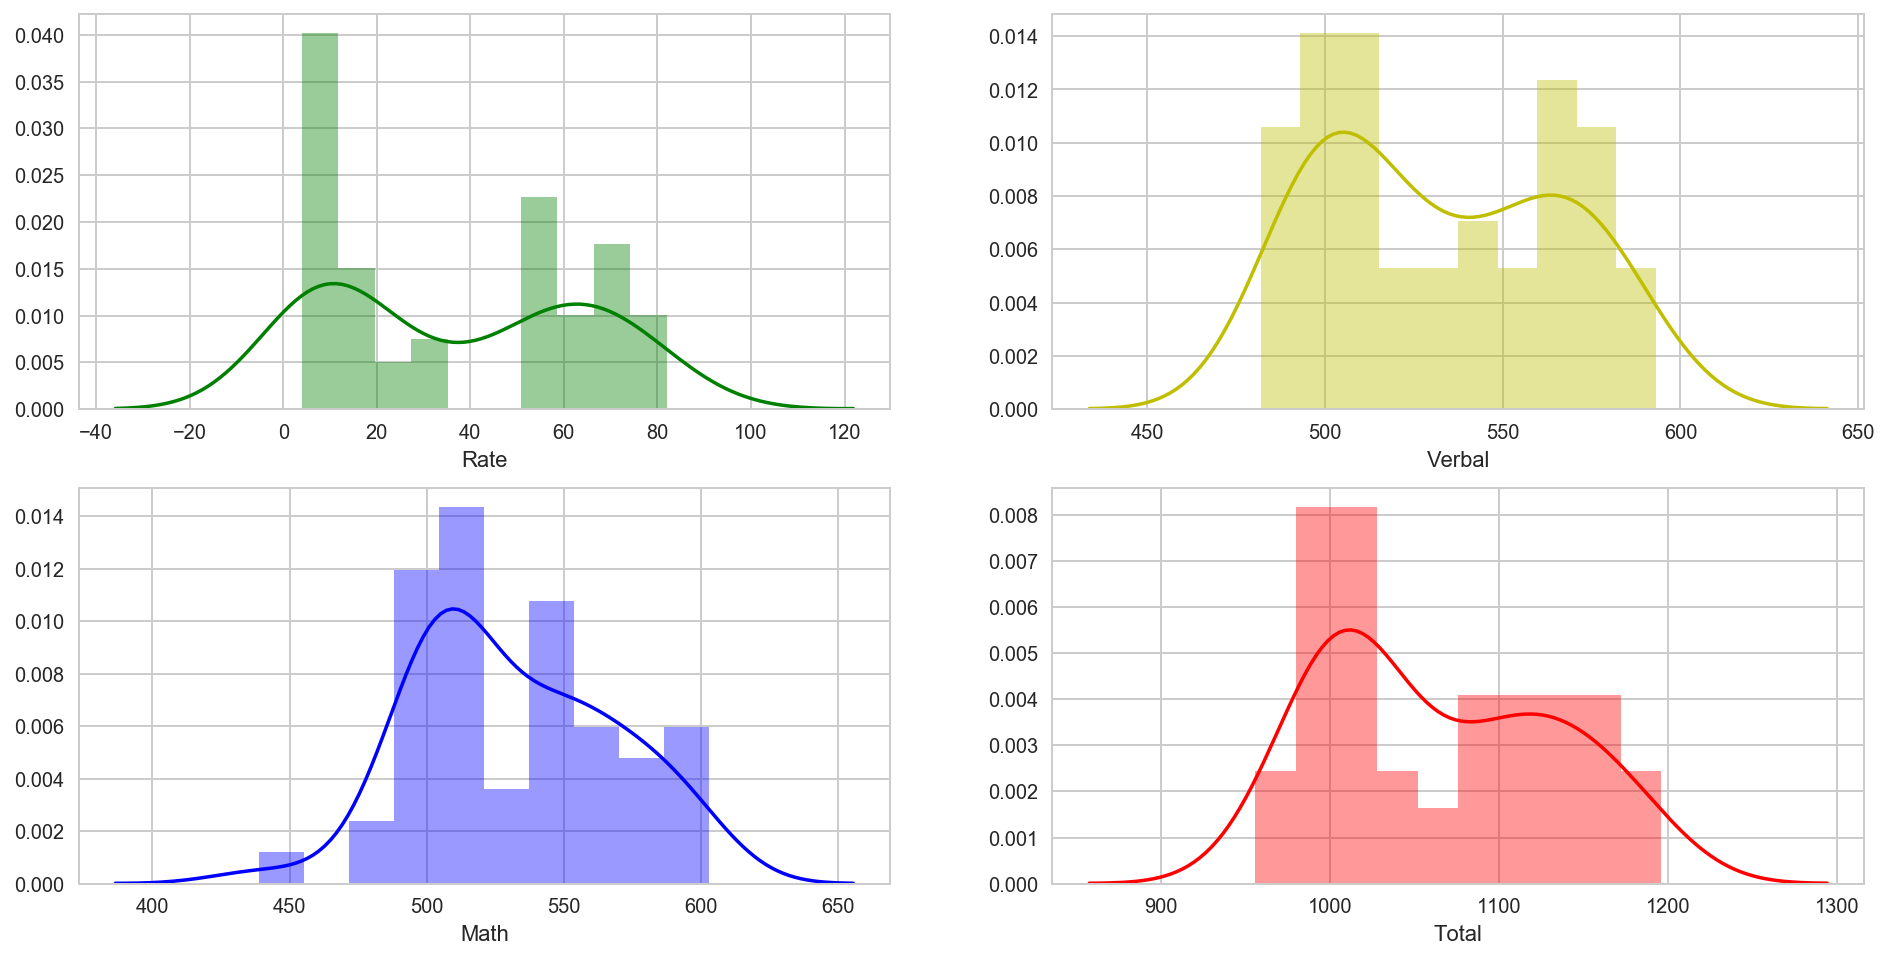

In [12]:
fig, axes = plt.subplots(2,2, figsize=(16,8))
sns.distplot(sat_df['Rate'], bins=10, color='g', ax=axes[0][0])
sns.distplot(sat_df['Verbal'], bins=10, color='y', ax=axes[0][1])
sns.distplot(sat_df['Math'], bins=10, color='b', ax=axes[1][0])
sns.distplot(sat_df['Total'], bins=10, color='r', ax=axes[1][1])

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

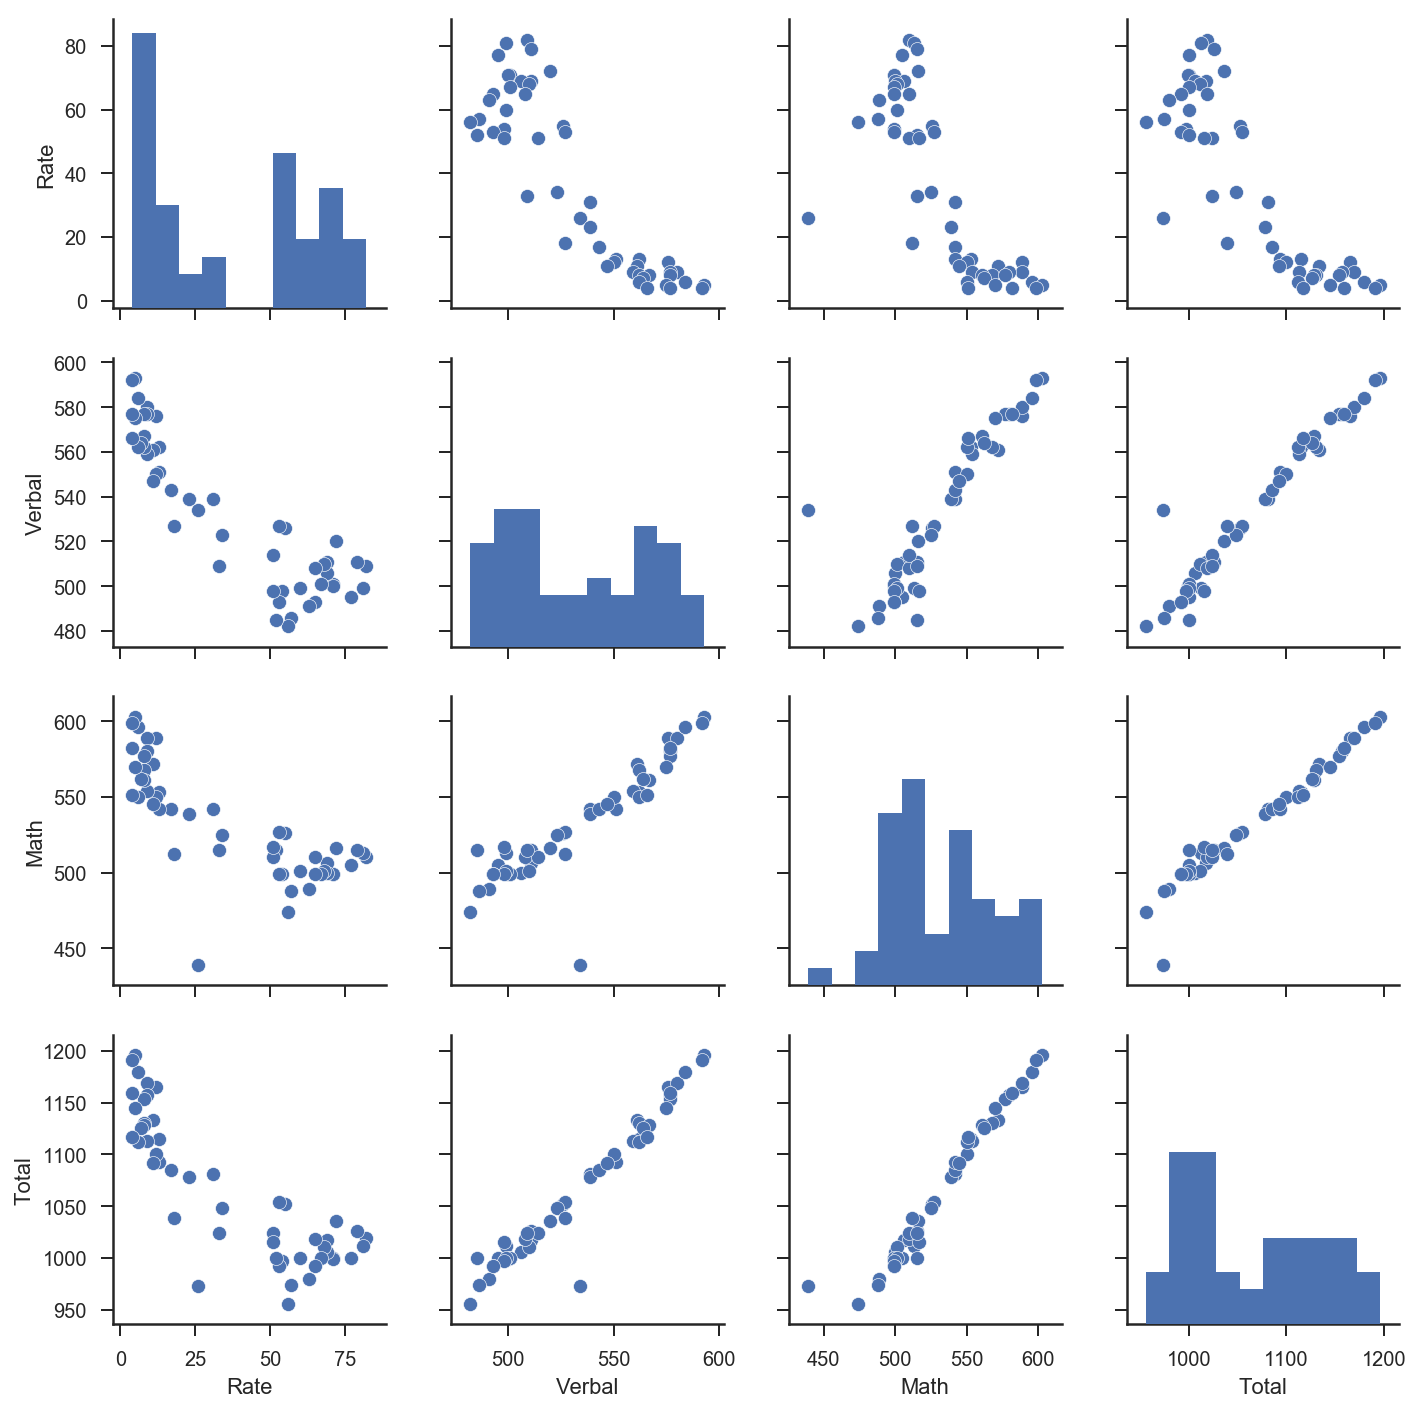

In [13]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sat_df)

plt.show()

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: purple; font-size: 15px">
a. Math and Verbal scores have positive correlation <br>
b. 2 clusters for rate vs test score plots - lower rates, higher scores and higher rates, lower scores 
</p>
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

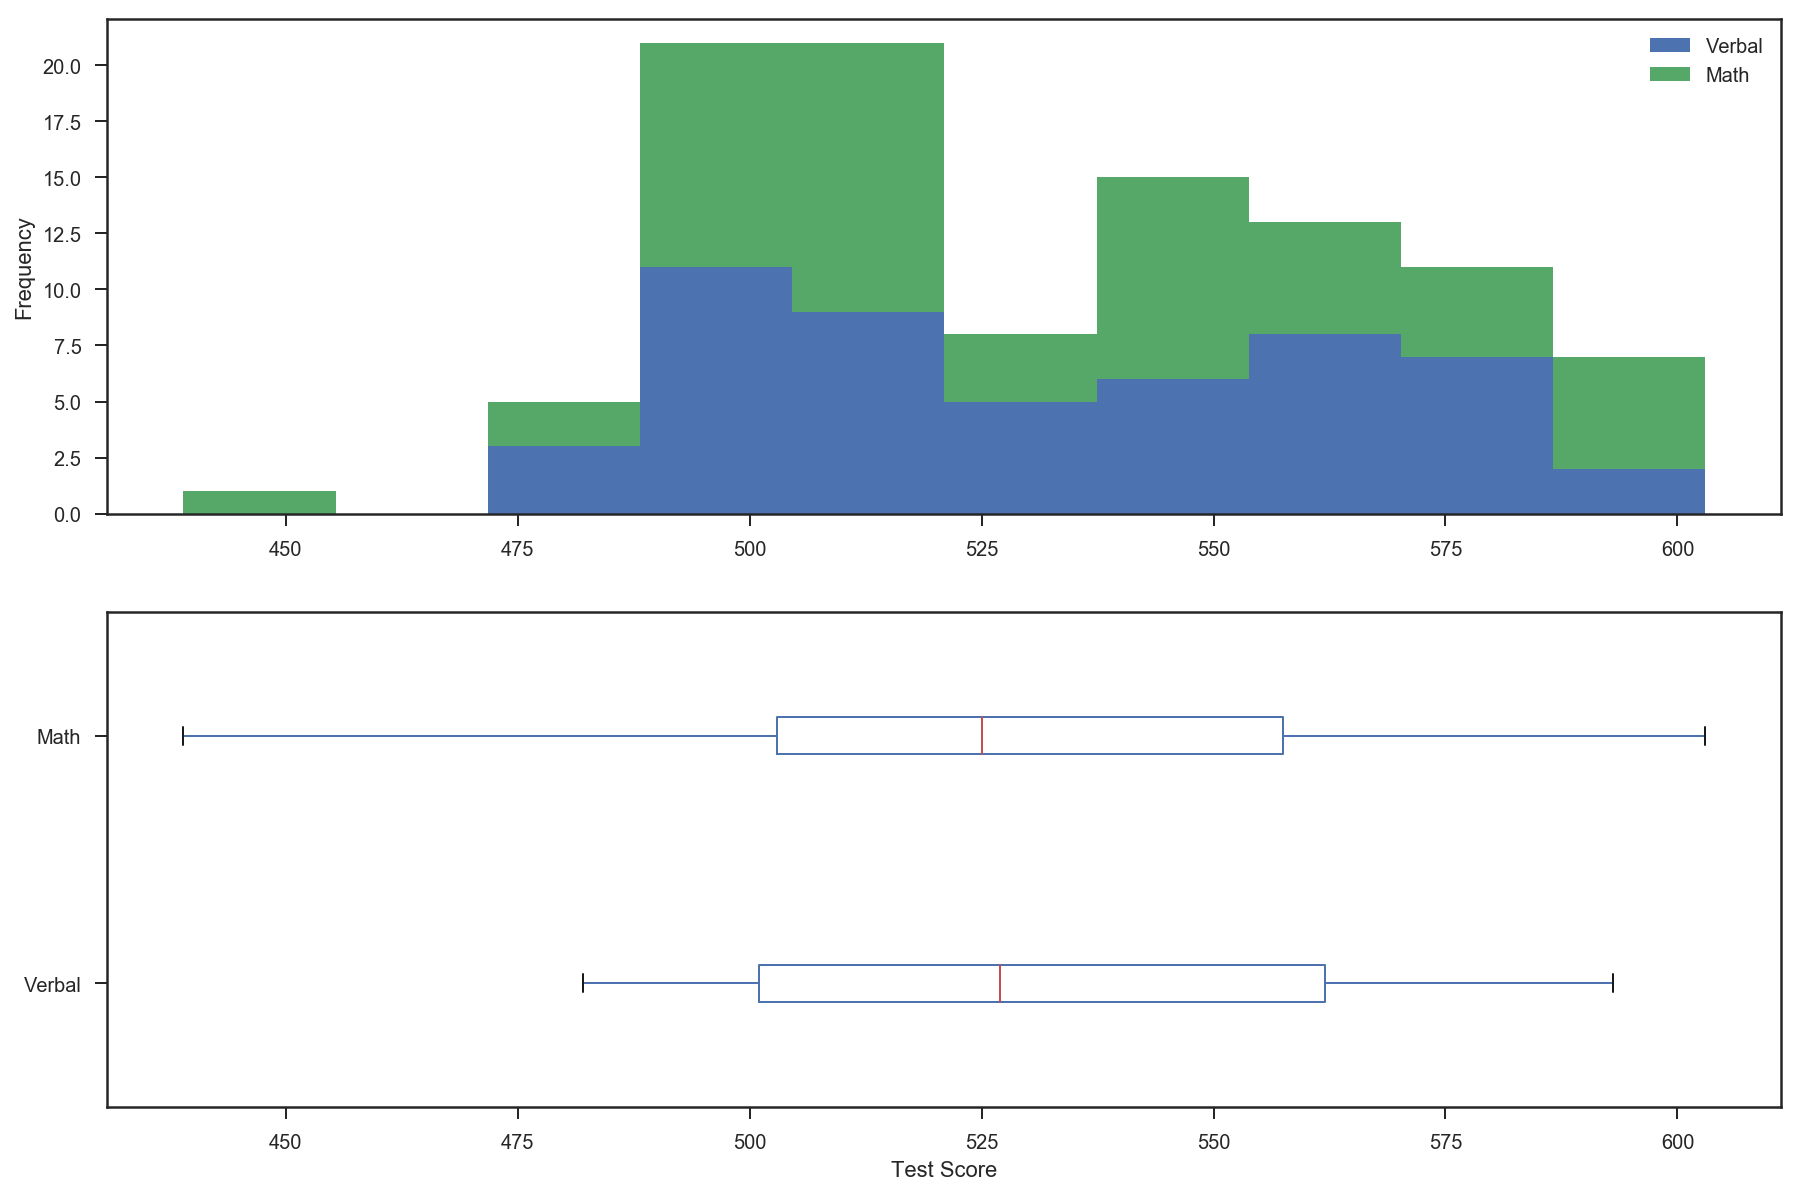

In [14]:
fig, axes = plt.subplots(2,1, figsize=(15,10))
sat_df[['Verbal', 'Math']].plot(kind='hist', stacked=True, ax=axes[0])
sat_df[['Verbal', 'Math']].plot(kind='box', vert=False, ax=axes[1])
plt.xlabel('Test Score')

plt.show()

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: green; font-size: 15px">
Histogram can show the shape of the distribution while boxplot can identify specific values such as median and percentiles better
</p>
</div>

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

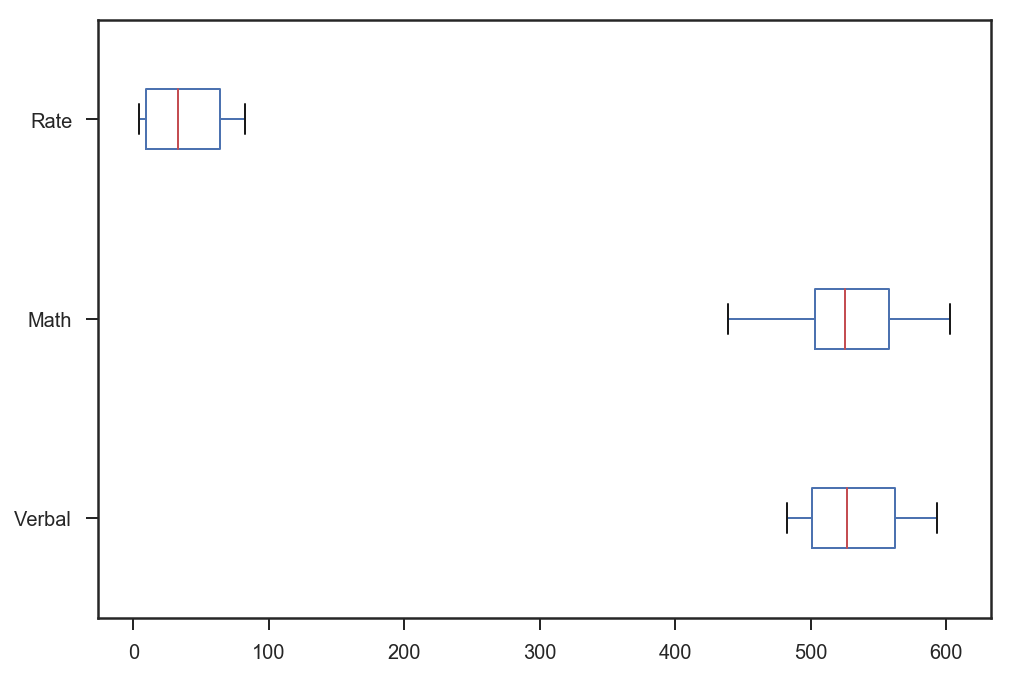

In [15]:
sat_df[['Verbal', 'Math','Rate']].plot(kind='box', vert=False)
plt.show()

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: coral; font-size: 15px">
1. Boxplot can identify specific percentiles and stretch of data <br>
2. Scale is different - loss of granularity
</p>
</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


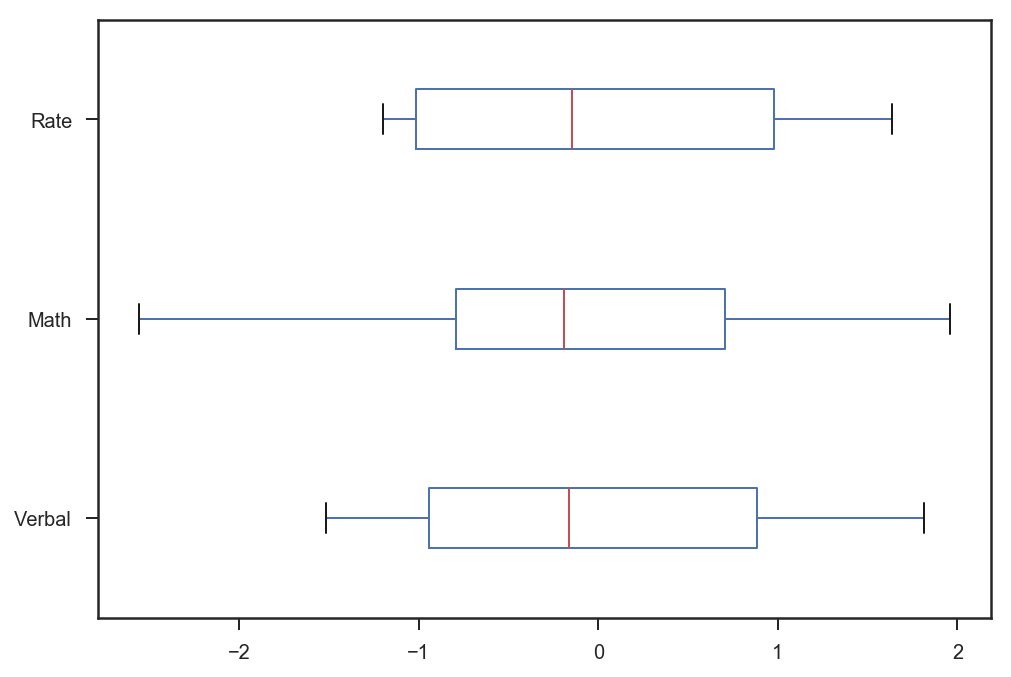

In [16]:
# Standardising variables to have normalised scale range for better comparison
sat_stand_verbal = (sat_df.Verbal - sat_df.Verbal.mean()) / sat_df.Verbal.std()
sat_stand_math = (sat_df.Math - sat_df.Math.mean()) / sat_df.Math.std()
sat_stand_rate = (sat_df.Rate - sat_df.Rate.mean()) / sat_df.Rate.std()

sat_stand = sat_df.copy()
sat_stand['Verbal'] = sat_stand_verbal
sat_stand['Math'] = sat_stand_math
sat_stand['Rate'] = sat_stand_rate

sat_stand[['Verbal', 'Math', 'Rate']].plot(kind='box', vert=False)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
a = sat_df.State[sat_df.Verbal > sat_df.Verbal.mean()]

print a.count(), 'states are above the mean'

24 states are above the mean


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
b = sat_df.State[sat_df.Verbal > sat_df.Verbal.median()]

print b.count(), 'states are above the median'

24 states are above the median


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: darkcyan; font-size: 15px">
Mean about the same as median so verbal scores quite normally distributed
</p>
</div>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat_df['Verbal - Math'] = sat_df.Verbal - sat_df.Math

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
f = sat_df[sat_df['Verbal'] > sat_df['Math']].sort_values('Verbal - Math', ascending=False).State[:10]
print f.head(3)

27    OH
29    WV
50    MS
Name: State, dtype: object


In [21]:
g = sat_df[sat_df['Verbal'] < sat_df['Math']].sort_values('Verbal - Math', ascending=False).State[:10]
print g.head(3)

0     CT
18    FL
14    IN
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat_df2 = sat_df[['Rate', 'Verbal', 'Math']]
sat_df2.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
sat_df2.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: DarkOrchid; font-size: 15px">
1. The covariance is a measure of "relatedness" between variables. <br>
   It is literally the sum of deviations from the mean of  XX  times deviations from the mean of YY
   adjusted by the sample size NN<br><br>

   Covariance is not very interpretable. <br>
   The values are difficult to read because they are relative to the variance of the variables.<br><br>

2. pearson correlation r = cor(X,Y) = cov(X,Y)/std(X)std(Y)<br><br>

3. Correlation matrix allows easy way to see the correlation between all the numeric variables.
</p>
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [24]:
drug = pd.read_csv('drug-use-by-age.csv', encoding = 'utf-8')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [25]:
drug.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,12,13,14,15,16,17,18,19,20,21
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2
alcohol-frequency,3,6,5,6,10,13,24,36,48,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33
marijuana-frequency,4,15,24,25,30,36,52,60,60,52
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0


In [26]:
# Replace '-' with Nan and convert object columns to float 
drug.info()
drug = drug.replace({'-' : 'Nan'})
drug['cocaine-frequency'] = drug['cocaine-frequency'].astype('float')
drug['crack-frequency'] = drug['crack-frequency'].astype('float')
drug['heroin-frequency'] = drug['heroin-frequency'].astype('float')
drug['inhalant-frequency'] = drug['inhalant-frequency'].astype('float')
drug['oxycontin-frequency'] = drug['oxycontin-frequency'].astype('float')
drug['meth-frequency'] = drug['meth-frequency'].astype('float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [27]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [28]:
drug.describe(include=['object','float64','int64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,17,17,22-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n,17,NaN,NaN,NaN,3251.06,1297.89,2223,2469,2798,3058,7391
alcohol-use,17,NaN,NaN,NaN,55.4294,26.8789,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17,NaN,NaN,NaN,33.3529,21.3188,3,10,48,52,52
marijuana-use,17,NaN,NaN,NaN,18.9235,11.9598,1.1,8.7,20.8,28.4,34
marijuana-frequency,17,NaN,NaN,NaN,42.9412,18.3626,4,30,52,52,72
cocaine-use,17,NaN,NaN,NaN,2.17647,1.81677,0,0.5,2,4,4.9
cocaine-frequency,16,NaN,NaN,NaN,7.875,8.03845,1,5,5.25,7.25,36
crack-use,17,NaN,NaN,NaN,0.294118,0.235772,0,0,0.4,0.5,0.6
crack-frequency,14,NaN,NaN,NaN,15.0357,18.1113,1,5,7.75,16.5,62


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: DarkGoldenRod; font-size: 15px">
1. Question - Do all drug types usage (%) have strong positive correlations with one another ?<br>
                (strong ~ correlation coefficient > 0.7)<br>
Hypothesis - All drug types usage do not have strong positive correlations with one another<br><br>

2. Deliverables - drug types with and without strong positive inter-correlations<br><br>

3. EDA techniques - correlation matrix, heat map, pair plots<br>
</p>
</div>

In [29]:
# Subsetting drug-use only 

drug_col = ['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use', 
            'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use',  
            'stimulant-use', 'meth-use', 'sedative-use']

drug_use = drug.loc[:, drug_col]

drug_use.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


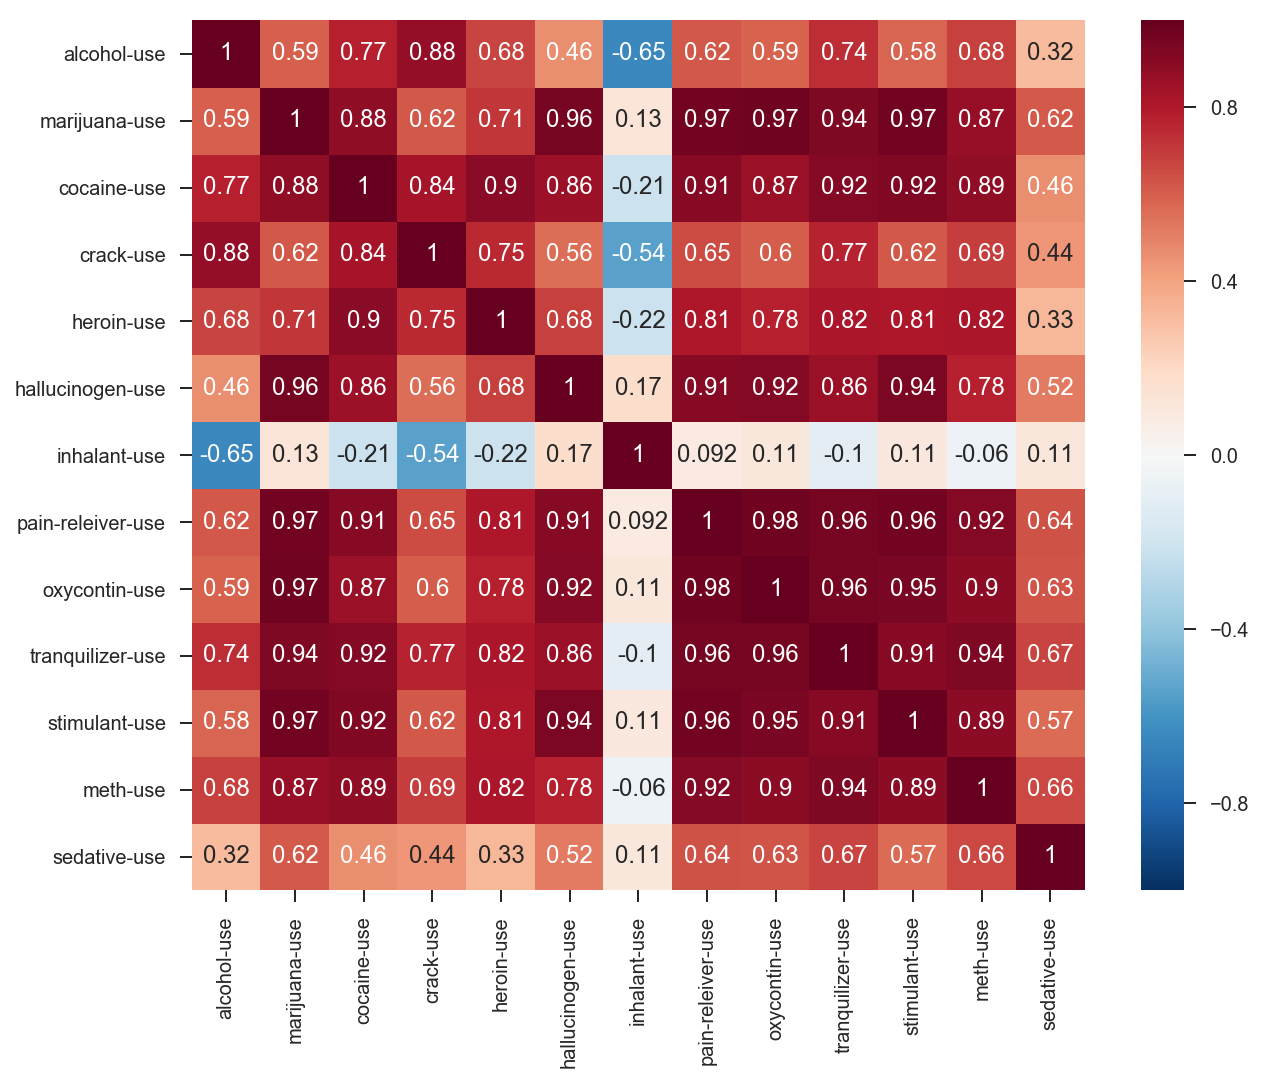

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(drug_use.corr(), annot=True)
plt.show()

inhalant-use pair plots


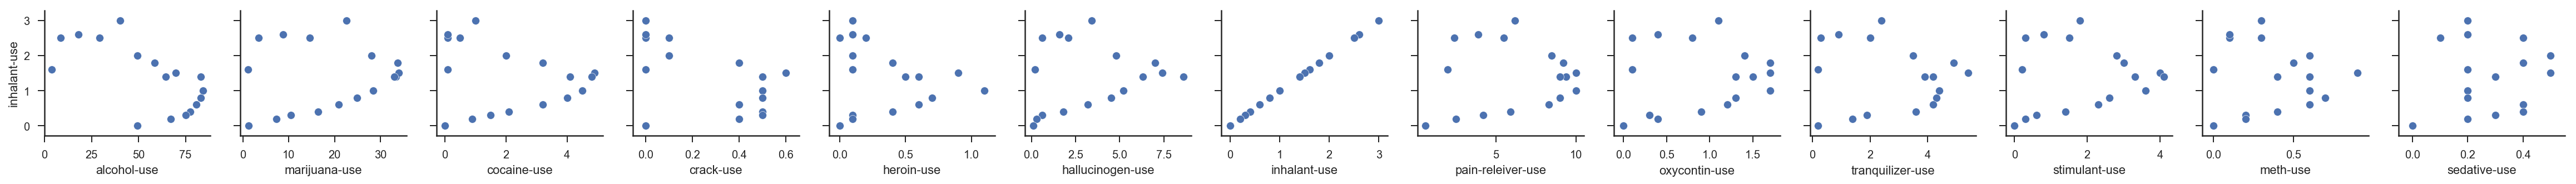

In [31]:
sns.set(style="ticks", color_codes=True)
print 'inhalant-use pair plots'
g = sns.pairplot(drug_use, y_vars=['inhalant-use'], x_vars=drug_col)
plt.show()

sedative-use pair plots


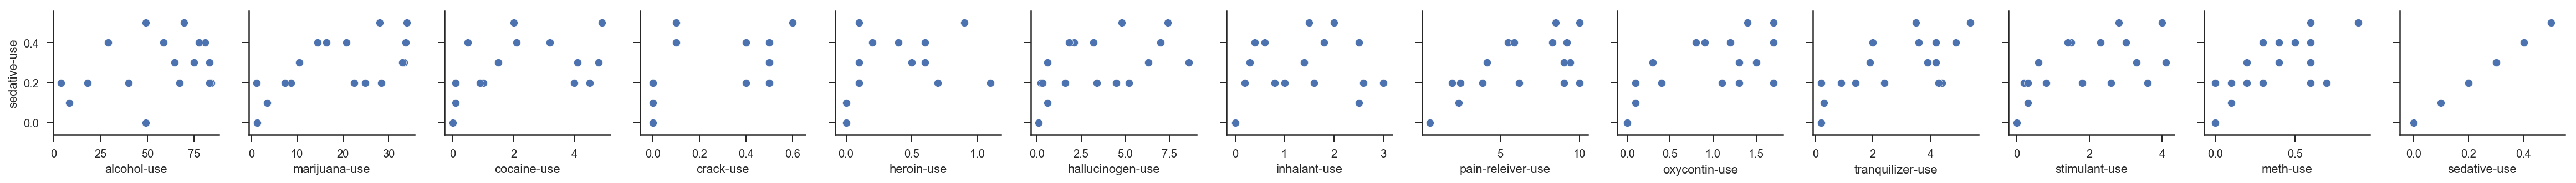

In [32]:
sns.set(style="ticks", color_codes=True)
print 'sedative-use pair plots'
g = sns.pairplot(drug_use, y_vars=['sedative-use'], x_vars=drug_col)
plt.show()

crack-use pair plots


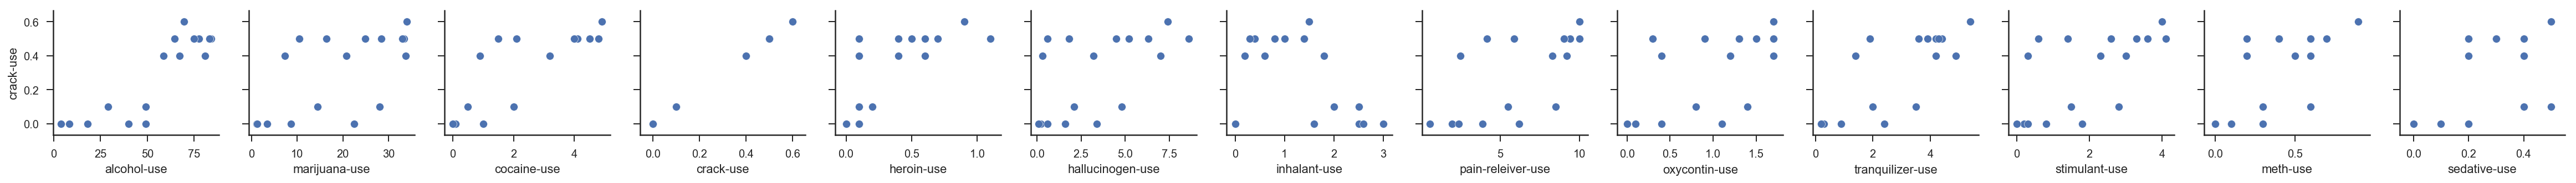

In [33]:
sns.set(style="ticks", color_codes=True)
print 'crack-use pair plots'
g = sns.pairplot(drug_use, y_vars=['crack-use'], x_vars=drug_col)
plt.show()

alcohol-use pair plots


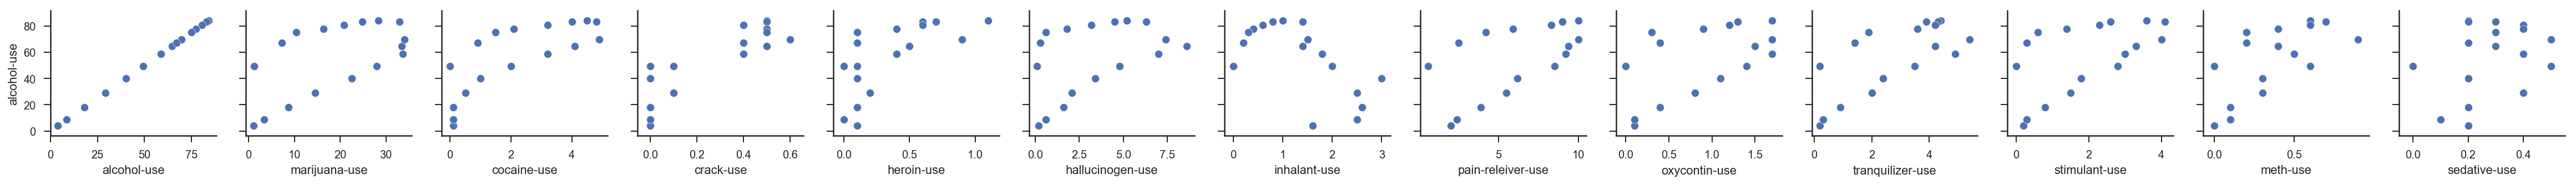

In [34]:
sns.set(style="ticks", color_codes=True)
print 'alcohol-use pair plots'
g = sns.pairplot(drug_use, y_vars=['alcohol-use'], x_vars=drug_col)
plt.show()

pair plots excluding inhalant, sedative, alcohol & crack


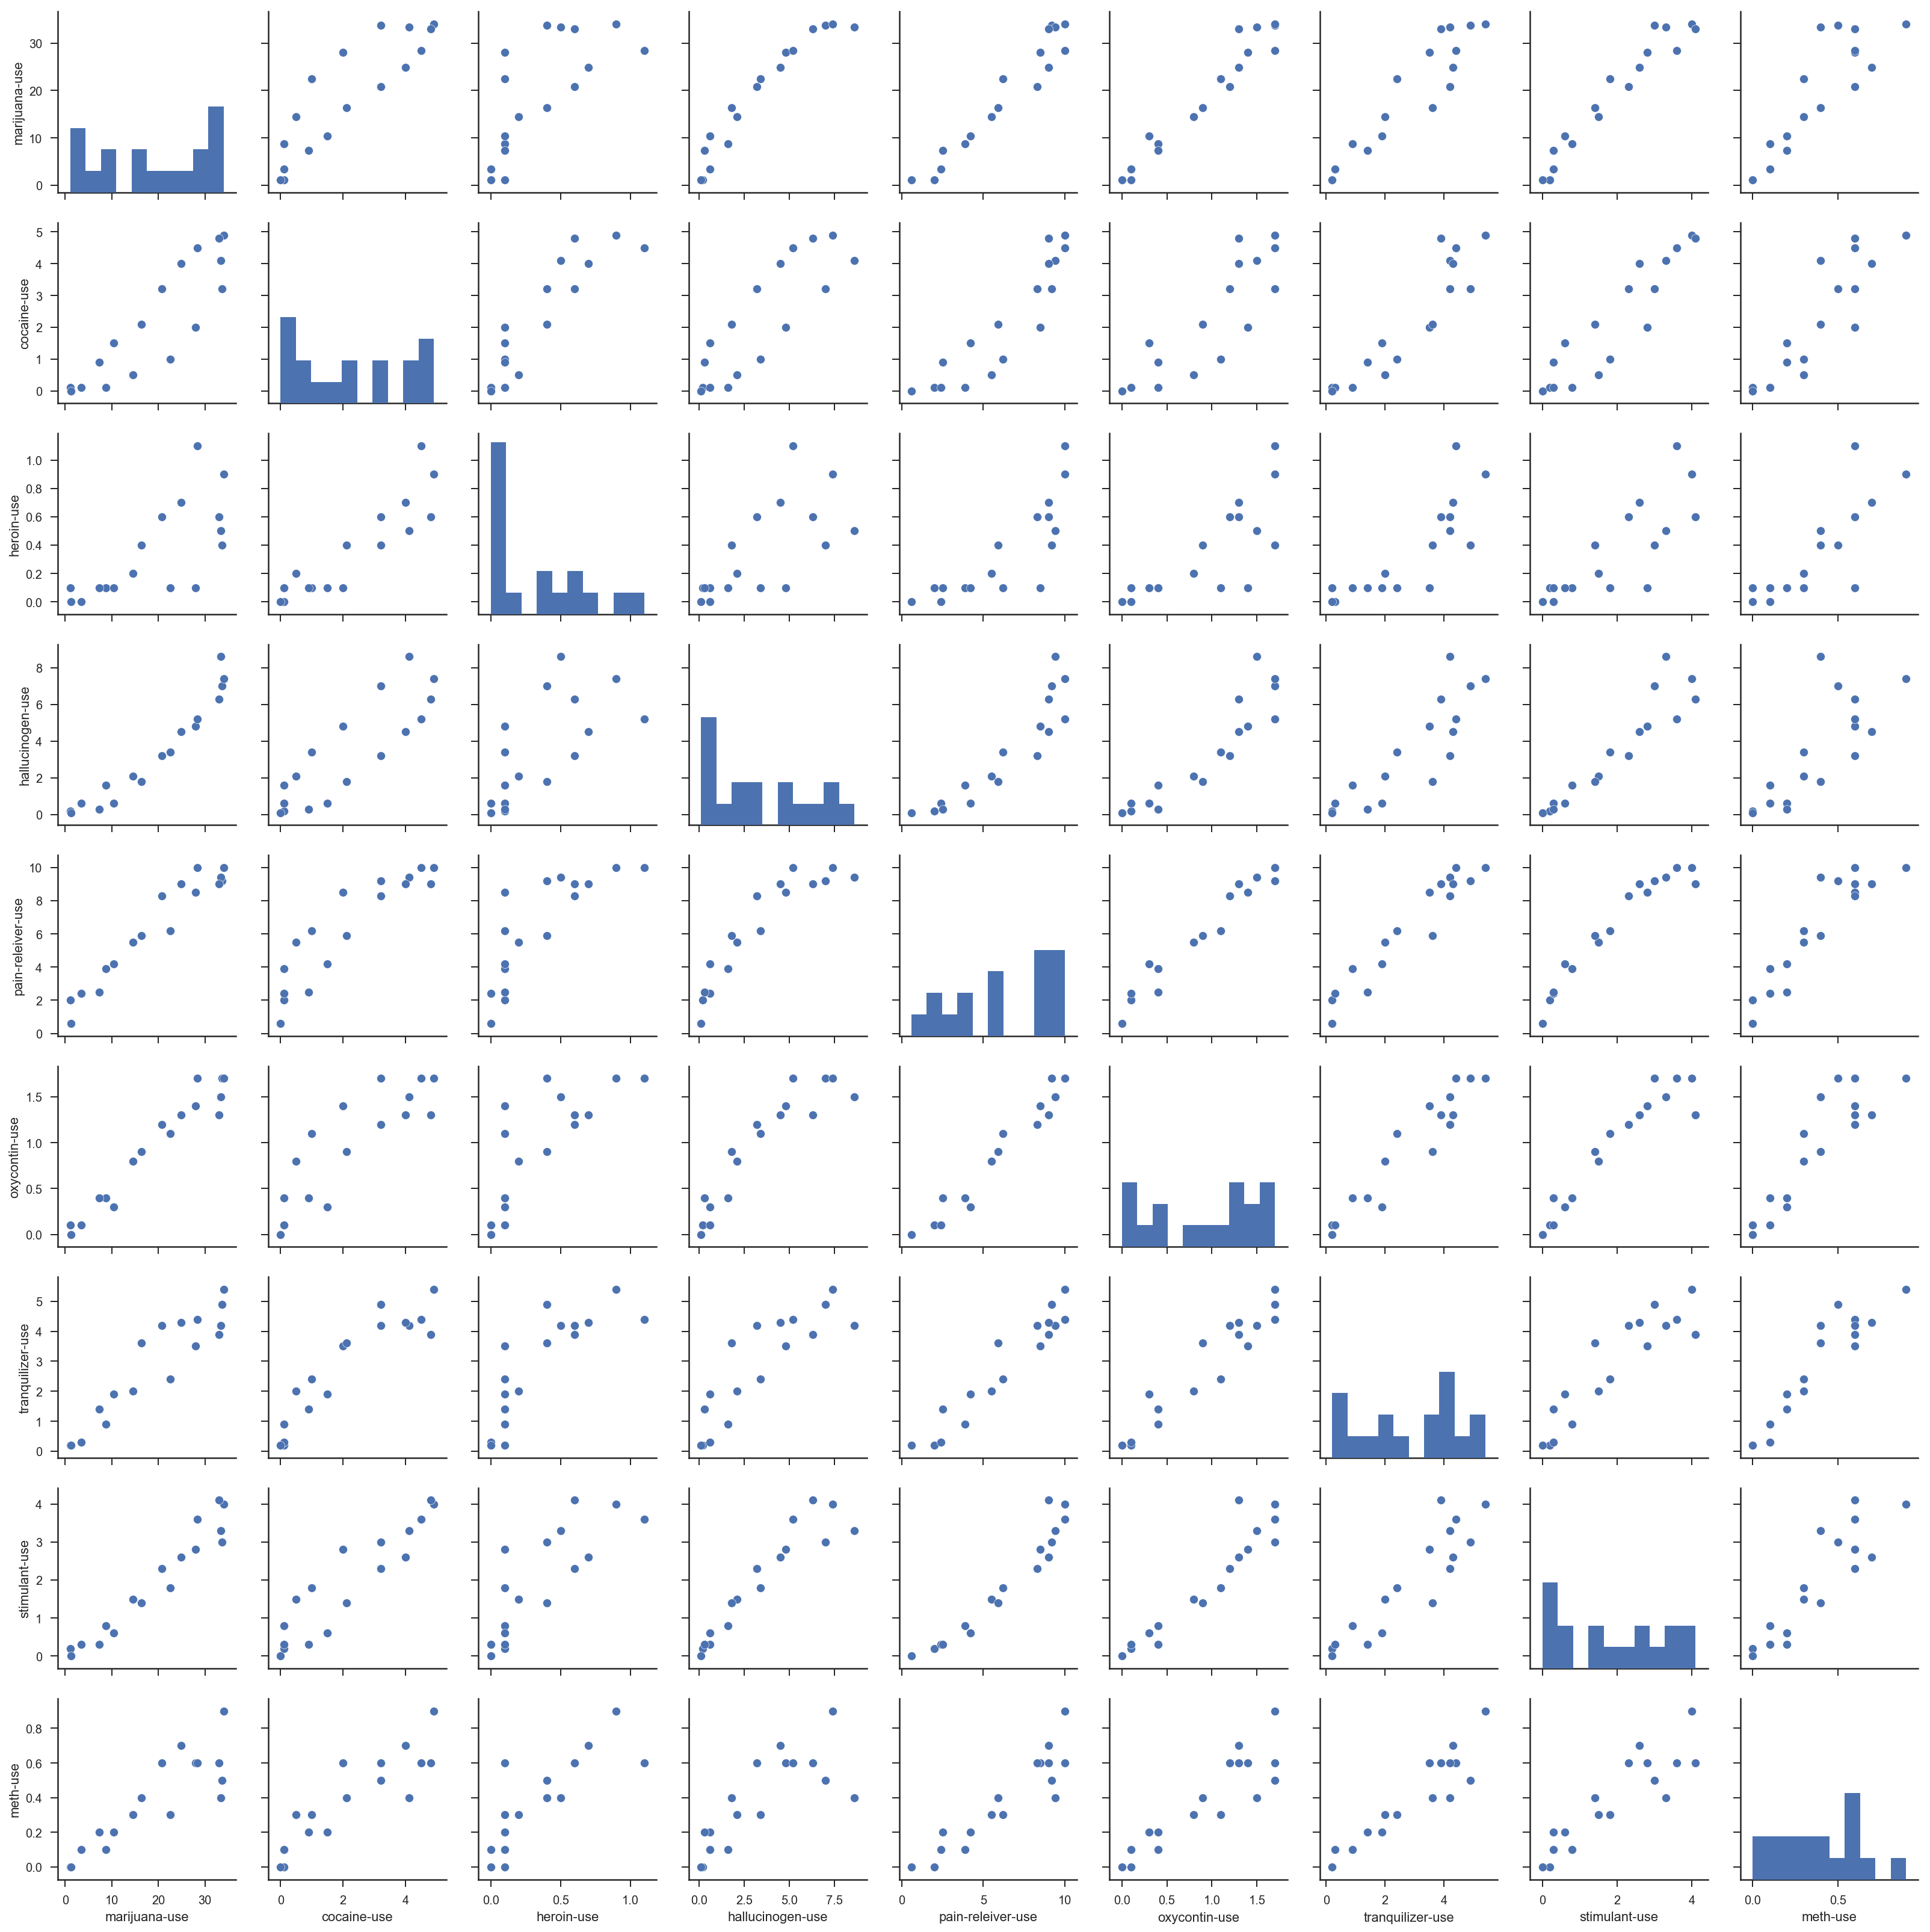

In [35]:
drug_col_corr = ['marijuana-use','cocaine-use','heroin-use', 'hallucinogen-use', 'pain-releiver-use',
                 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use']
drug_use_corr = drug.loc[:, drug_col_corr]

sns.set(style="ticks", color_codes=True)
print 'pair plots excluding inhalant, sedative, alcohol & crack'
g = sns.pairplot(drug_use_corr)
plt.show()

**_Report_** 


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: DarkSlateGray; font-size: 15px">
Drug usage that do not have strong positive correlations with one another : inhalant, sedative, crack and alcohol
inhalant being the most distinct type
</p>
</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: DarkMagenta; font-size: 15px">
Box plots with fences<br>
A box plot is constructed by drawing a box between the upper and lower quartiles with a 
solid line drawn across the box to locate the median. The following quantities (called fences) are needed for 
identifying extreme values in the tails of the distribution:<br><br>
IQ = Q3 - Q1<br>
lower inner fence: Q1 - 1.5*IQ<br>
upper inner fence: Q3 + 1.5*IQ<br>
lower outer fence: Q1 - 3*IQ<br>
upper outer fence: Q3 + 3*IQ<br><br>

Outlier detection criteria:<br>
A point beyond an inner fence on either side is considered a mild outlier.<br>
A point beyond an outer fence is considered an extreme outlier.
</p>
</div>

In [36]:
rate_col = sat_df.Rate
firstQ = np.percentile(rate_col, 25)
secondQ = np.percentile(rate_col, 50)
thirdQ = np.percentile(rate_col, 75)

InterQ = thirdQ - firstQ

lif = firstQ - 1.5*InterQ
uif = thirdQ + 1.5*InterQ
lof = firstQ - 3.0*InterQ
uof = thirdQ + 3.0*InterQ

print rate_col.describe()
print ''
print 'lower inner fence:',lif
print 'upper inner fence:',uif
print ''
print 'There are no outliers in this case'

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

lower inner fence: -73.5
upper inner fence: 146.5

There are no outliers in this case


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: FireBrick; font-size: 15px">
1.<br> 
Pearson benchmarks linear relationship, Spearman benchmarks monotonic relationship<br><br>

Monotonic relationships are where:<br><br>

One variable increases and the other increases. Or,<br>
One variable decreases and the other decreases.<br><br>

This increase (or decrease) doesn’t have to happen at the same rate.<br>
Linear relationships are monotonic, but not all monotonic relationships are linear.<br>
</p>
</div>

<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: ForestGreen; font-size: 15px">
2.<br>
a. provide a ranking score for the elements in the 2 variables relative to the other elements in those 
variables respectively<br><br>
b. Find the difference in ranking between the the 2 variables for each element<br><br>
c. Apply the following equation to calculate the coefficient:<br>
        p = 6 * sum(ranking difference) / n * (n**2 - 1)<br>
        where n if the number of elements in each variable<br>
</p>
</div>

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [37]:
"""
Percentile calculation formula based on value
    Percentile = (length(data(data < value)) + 0.5 * frequency of value) / length(data)*100
"""

sat_df['Rate_percentile'] = [stats.percentileofscore(sat_df.Rate, i) for i in sat_df.Rate]
p = np.array(sat_df.Rate_percentile[sat_df.State == 'CA'])[0]
print 'Percentile of California in Rate is', round(p)

Percentile of California in Rate is 56.0


<div style= "border-style: ridge; padding: 15px; background-color:#F5F5F5">
<p  style= "font-family: 'Comic Sans MS', cursive, sans-serif; color: ForestGreen; font-size: 15px">
3. Percentile of a particular value is similar to its Rank in calculating the Spearman coefficient
</p>
</div>

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

## 1. Those with percentile scores of < 1 or > 99 can be potential outliers##
![charmander](percentile.gif)

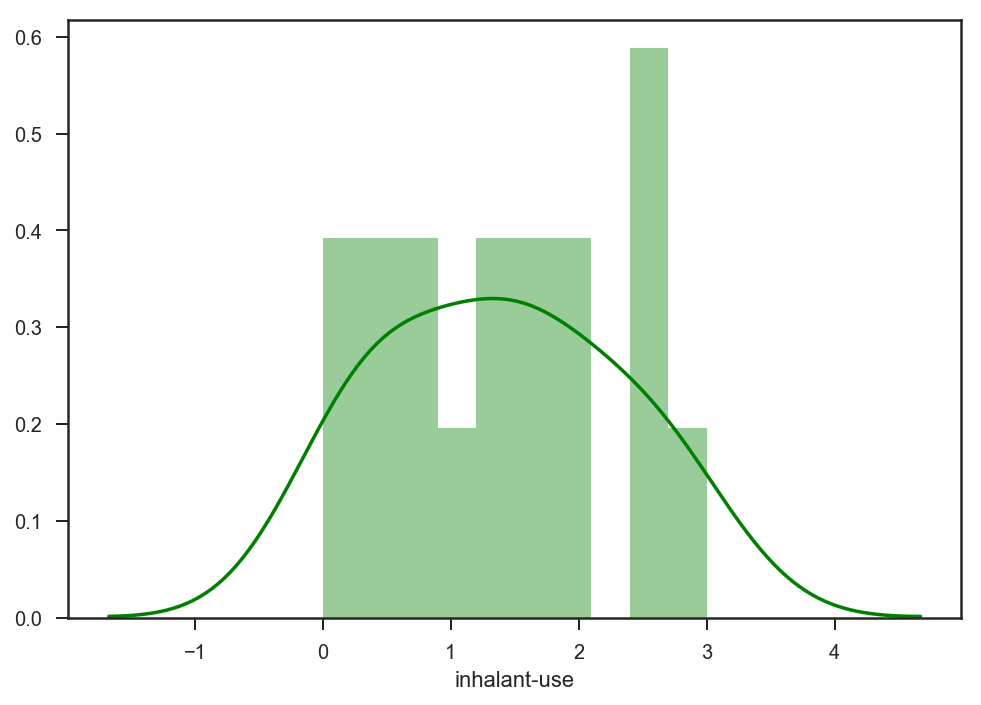

In [38]:
sns.distplot(drug['inhalant-use'], bins=10, color='green')

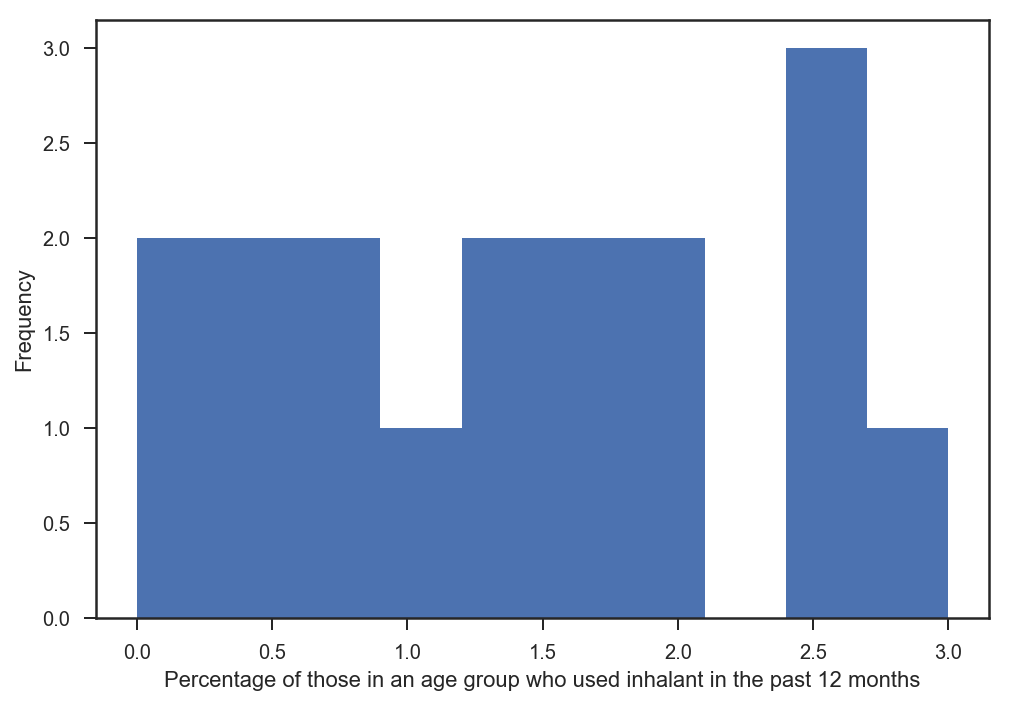

In [39]:
drug['inhalant-use'].plot(kind='hist', bins=10)
plt.xlabel('Percentage of those in an age group who used inhalant in the past 12 months')
plt.show()

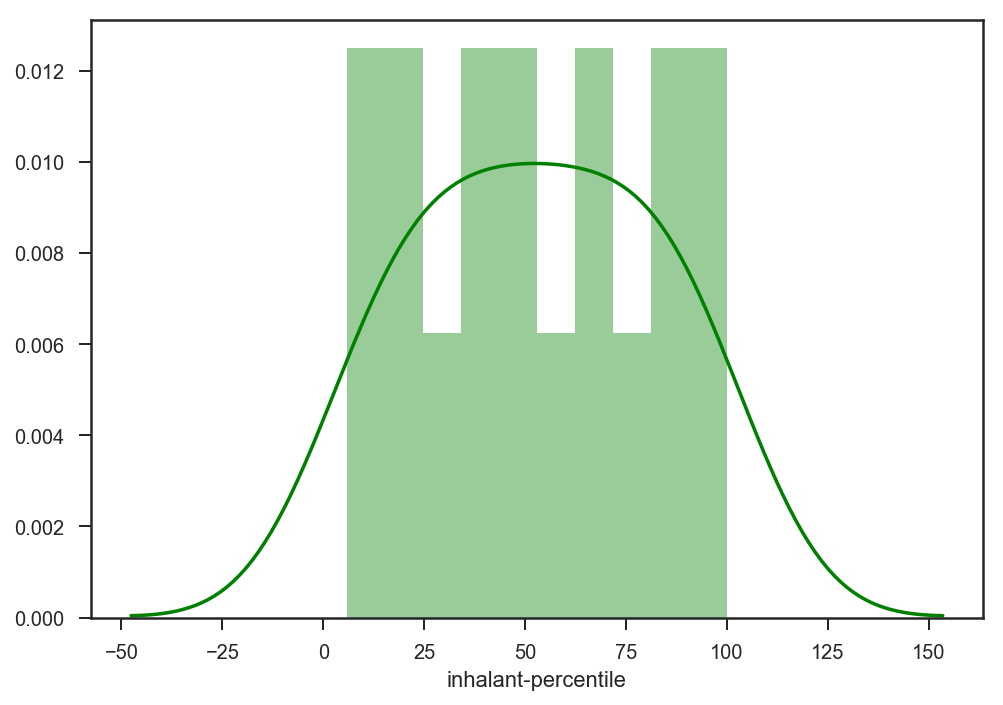

In [41]:
sns.distplot(drug['inhalant-percentile'], bins=10, color='green')

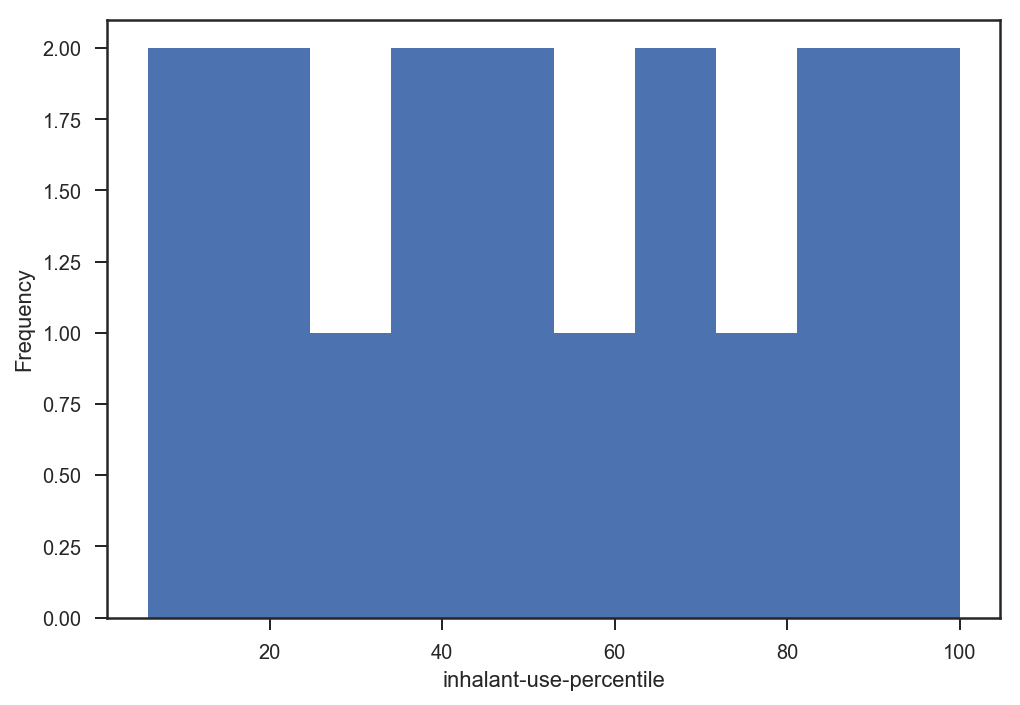

In [40]:
drug['inhalant-percentile'] = [stats.percentileofscore(drug['inhalant-use'], i) for i in drug['inhalant-use']]
drug['inhalant-percentile'].plot(kind='hist', bins=10)
plt.xlabel('inhalant-use-percentile')
plt.show()